# 🚲 Cyclistic Bike Share User Behavior Analysis

## Project Description:

This project explores one year of ride data from the **Cyclistic bike-sharing program** in Chicago. The goal is to uncover patterns in user behavior, identify peak usage times, and compare how **casual users** and **annual members** use the service differently.

The dataset includes:
- Ride start and end times
- Station locations (latitude & longitude)
- Rideable bike types (classic, docked, electric)
- User membership status (casual/member)

Using **Python-based exploratory data analysis (EDA)** and **geospatial visualization**, this project aims to provide actionable insights that can improve Cyclistic's marketing strategies, bike distribution, and service planning.

---

## Problem Statement:

Cyclistic wants to understand the riding behavior of **casual** vs **member** users. The organization is exploring how to convert more casual users into loyal annual members. 

To support this, we analyze:
- When users ride (days, hours, months)
- How long they ride (duration analysis)
- Where they ride (popular stations & geospatial maps)
- What type of bikes are most preferred

This analysis helps Cyclistic make **data-driven decisions** to:
- Improve customer engagement
- Optimize bike availability
- Target casual riders more effectively


# Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate interactive map using Folium
import folium

# Load Dataset

In [3]:
# Load the cleaned and merged Cyclistic dataset
df = pd.read_csv("merged_divvy_data.csv")
df.head() # Displays the first five rows of the dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,day_of_week,hour,month,duration_category
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.929143,-87.649077,41.936253,-87.652662,member,5.616667,Saturday,0,September,5-15 min
1,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.931248,-87.644336,41.925566,-87.658416,member,11.600000,Saturday,9,September,5-15 min
2,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.875061,-87.633135,41.861267,-87.656625,member,11.466667,Monday,18,September,5-15 min
3,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.931248,-87.644336,41.939743,-87.658865,member,8.483333,Wednesday,15,September,5-15 min
4,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.929143,-87.649077,41.925566,-87.658416,member,6.100000,Monday,15,September,5-15 min


# Data Cleaning

In [4]:
# Remove missing values
df.dropna(inplace=True)

# Convert string to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
# Convert string to datetime format
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60 

# Remove invalid durations
df = df[df['ride_duration'] > 0]

# Feature Engineering

In [5]:
# Extract day of the week
df['day_of_week'] = df['started_at'].dt.day_name()

# Extract hour of the day
df['hour'] = df['started_at'].dt.hour

# Extract month name
df['month'] = df['started_at'].dt.month_name()

# Basic Info and Summary  EDA

In [6]:
# Check shape (rows, columns)
df.shape

(2052734, 18)

In [7]:
# Summary of dataset: columns, datatypes, and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052734 entries, 0 to 2052733
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration       float64       
 14  day_of_week         object        
 15  hour                int32         
 16  month               object        
 17  duration_category   object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(10)
memory usage: 274.1+ MB


In [8]:
# Summary statistics for numeric columns
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_duration,hour
count,2052734,2052734,2.052734e+06,2.052734e+06,2.052734e+06,2.052734e+06,2.052734e+06,2.052734e+06
mean,2023-08-27 05:49:57.389908992,2023-08-27 06:05:03.024892160,4.190185e+01,-8.764442e+01,4.190236e+01,-8.764475e+01,1.509392e+01,1.417622e+01
min,2023-07-01 00:00:00,2023-07-01 00:03:30,4.164850e+01,-8.784409e+01,4.164850e+01,-8.784396e+01,1.666667e-02,0.000000e+00
25%,2023-07-29 13:09:24,2023-07-29 13:31:50.249999872,4.188096e+01,-8.765703e+01,4.188103e+01,-8.765814e+01,6.016667e+00,1.100000e+01
50%,2023-08-25 15:32:26,2023-08-25 15:49:24.500000,4.189679e+01,-8.764150e+01,4.189766e+01,-8.764182e+01,1.045000e+01,1.500000e+01
75%,2023-09-24 10:47:51,2023-09-24 11:04:58.500000,4.192889e+01,-8.762783e+01,4.192914e+01,-8.762783e+01,1.843333e+01,1.800000e+01
max,2023-10-31 23:59:57,2023-11-01 00:47:26,4.206485e+01,-8.752823e+01,4.206485e+01,-8.752823e+01,1.200000e+02,2.300000e+01
std,NaN,NaN,4.258961e-02,2.473725e-02,4.277850e-02,2.492500e-02,1.505495e+01,4.904882e+00


# Rides by Member Type

C:\Users\shiva\AppData\Local\Temp\ipykernel_22700\1151598641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_casual', palette='Set2')


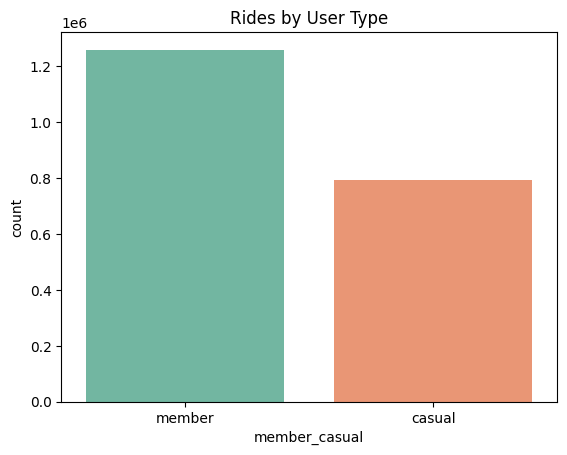

In [9]:
# Create a countplot for categorical data
sns.countplot(data=df, x='member_casual', palette='Set2')
plt.title("Rides by User Type")
plt.show()

# Average Ride Duration by Member Type

C:\Users\shiva\AppData\Local\Temp\ipykernel_22700\1760800252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='member_casual', y='ride_duration', palette='coolwarm')


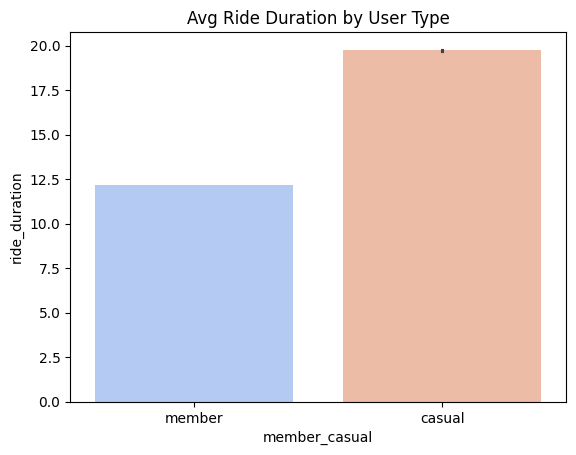

In [10]:
# Create a barplot for average values
sns.barplot(data=df, x='member_casual', y='ride_duration', palette='coolwarm')
plt.title("Avg Ride Duration by User Type")
plt.show()

# Rides by Day of Week

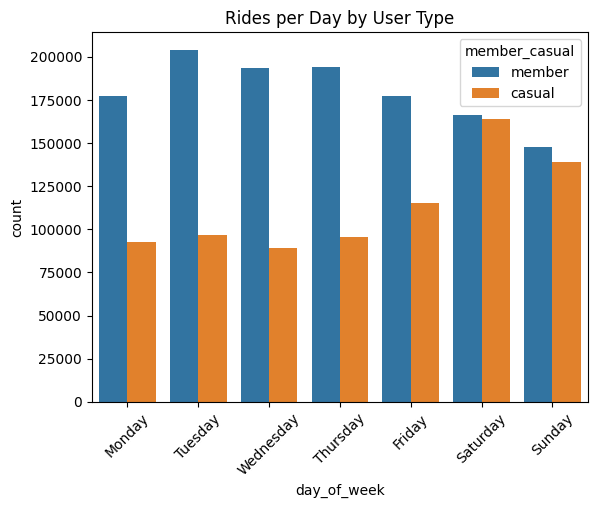

In [11]:
# Create a countplot for categorical data
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='member_casual')
plt.title("Rides per Day by User Type")
plt.xticks(rotation=45)
plt.show()

# Rides by Hour of Day

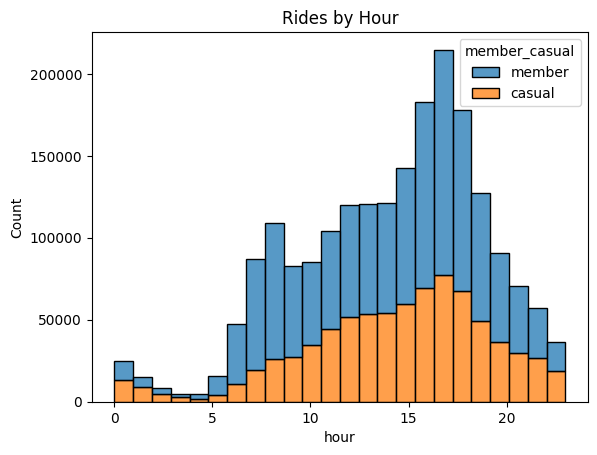

In [12]:
# Extract hour of the day
sns.histplot(data=df, x='hour', bins=24, hue='member_casual', multiple='stack')
plt.title("Rides by Hour")
plt.show()

# Rides by Month

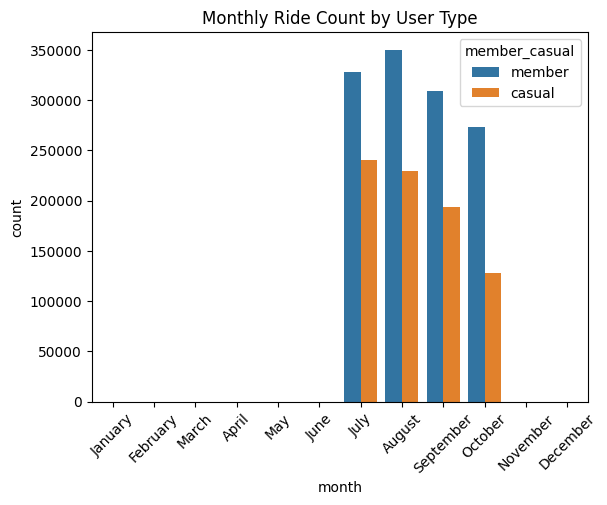

In [13]:
# Extract month name
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Extract month name
sns.countplot(data=df, x='month', order=month_order, hue='member_casual')
plt.title("Monthly Ride Count by User Type")
plt.xticks(rotation=45)
plt.show()

# Geospatial Mapping of Popular Stations

In [14]:
# Step 1: Count rides from each start station (with coordinates)
top_stations = (
    df[['start_station_name', 'start_lat', 'start_lng']]  # Select relevant columns
    .dropna()                                              # Remove rows with missing coordinates or station names
    .groupby(['start_station_name', 'start_lat', 'start_lng'])  # Group by station and its coordinates
    .size()                                                # Count number of rides from each station
    .reset_index(name='count')                             # Convert Series to DataFrame with column 'count'
    .sort_values('count', ascending=False)                 # Sort by number of rides
    .head(50)                                              # Select top 50 busiest stations
)

In [15]:
# Step 2: Create base map centered around Chicago
bike_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

In [16]:
# Step 3: Add a circle marker for each popular station
for _, row in top_stations.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],     # Set location using lat/lng
        radius=row['count'] / 500,                         # Scale the radius by ride count
        popup=row['start_station_name'],                   # Show station name on click
        color='blue',
        fill=True,
        fill_color='lightblue'
    ).add_to(bike_map)

# Optional: To display in Jupyter Notebook
bike_map

# Export Cleaned Data (Optional)

In [17]:
# Export final dataset to CSV
df.to_csv("merged_divvy_data.csv", index=False)

# Top 10 Most Frequent Start Stations

In [18]:
df['start_station_name'].value_counts().head(10)

start_station_name
Streeter Dr & Grand Ave               32584
DuSable Lake Shore Dr & Monroe St     20445
DuSable Lake Shore Dr & North Blvd    18877
Michigan Ave & Oak St                 18840
Theater on the Lake                   15575
Clark St & Elm St                     15572
Millennium Park                       14387
Kingsbury St & Kinzie St              14037
Wells St & Concord Ln                 13995
Wells St & Elm St                     12851
Name: count, dtype: int64

# Total Rides by Bike Type

In [19]:
df['rideable_type'].value_counts()

rideable_type
classic_bike     1359451
electric_bike     662855
docked_bike        30428
Name: count, dtype: int64

# Average Ride Duration by Bike Type

In [20]:
df.groupby('rideable_type')['ride_duration'].mean().round(2)

rideable_type
classic_bike     15.86
docked_bike      34.69
electric_bike    12.63
Name: ride_duration, dtype: float64

# Average Ride Duration by Day of Week

In [21]:
df.groupby('day_of_week')['ride_duration'].mean().round(2).sort_values()

day_of_week
Wednesday    13.28
Thursday     13.42
Tuesday      13.93
Monday       14.34
Friday       14.86
Saturday     17.65
Sunday       17.80
Name: ride_duration, dtype: float64

# Save Weekly Summary to CSV

In [22]:
weekly_summary = df.groupby(['day_of_week', 'member_casual'])['ride_duration'].agg(['count', 'mean']).reset_index()

# Export final dataset to CSV
weekly_summary.to_csv("weekly_summary.csv", index=False)

# Total Rides per Month

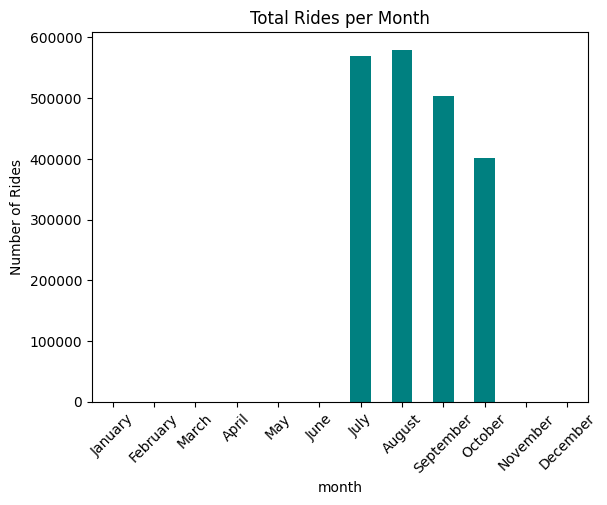

In [23]:
# Extract month name
monthly_rides = df['month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

# Extract month name
monthly_rides.plot(kind='bar', color='teal')
plt.title("Total Rides per Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

# Ride Counts by Day & Hour (Heatmap Style Table)

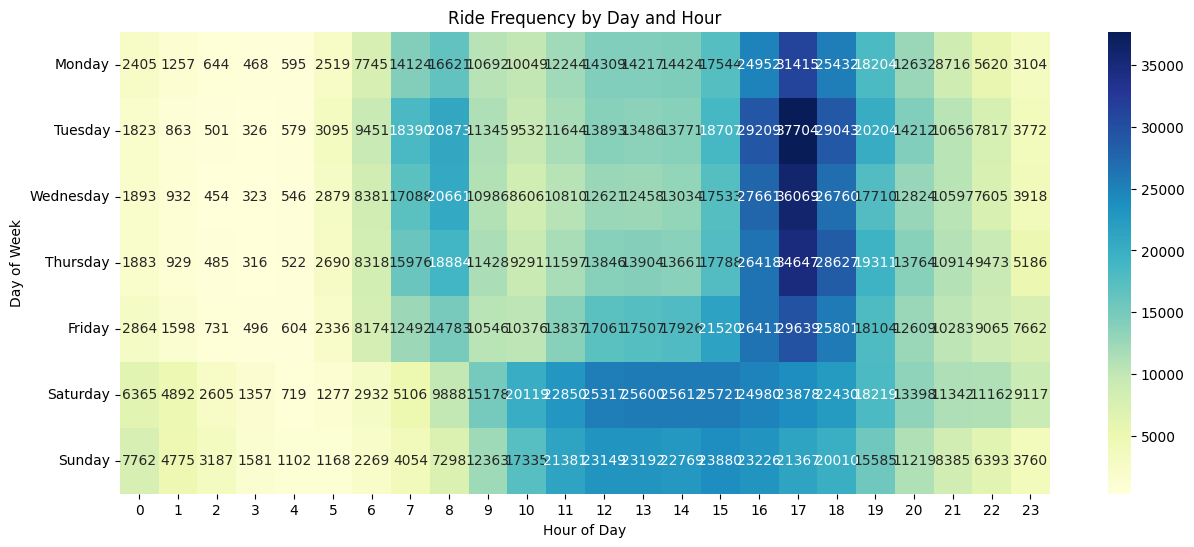

In [24]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='day_of_week', columns='hour', values='ride_duration', aggfunc='count')

# Reorder days for better readability
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.0f')  # <- fix here
plt.title("Ride Frequency by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# Most Popular Ride Duration Ranges

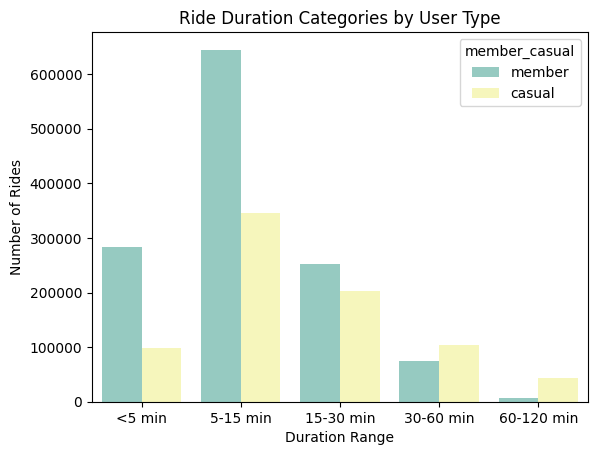

In [25]:
# Create duration bins
df['duration_category'] = pd.cut(df['ride_duration'], bins=[0, 5, 15, 30, 60, 120], 
                                  labels=['<5 min', '5-15 min', '15-30 min', '30-60 min', '60-120 min'])

# Plot distribution
# Create a countplot for categorical data
sns.countplot(data=df, x='duration_category', hue='member_casual', palette='Set3')
plt.title("Ride Duration Categories by User Type")
plt.xlabel("Duration Range")
plt.ylabel("Number of Rides")
plt.show()

# Start-End Station Popular Pairs (Top 10)

In [26]:
# Group the data by both 'start_station_name' and 'end_station_name'
# Then count how many times each start-end pair occurs using .size()
popular_pairs = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

# Sort the resulting pairs by the count in descending order to get the most popular routes first
popular_pairs = popular_pairs.sort_values('count', ascending=False).head(10)

# Print the top 10 most common start-end station pairs along with their usage count
print(popular_pairs)

                       start_station_name                   end_station_name  \
118478            Streeter Dr & Grand Ave            Streeter Dr & Grand Ave   
42816   DuSable Lake Shore Dr & Monroe St  DuSable Lake Shore Dr & Monroe St   
81353               Michigan Ave & Oak St              Michigan Ave & Oak St   
45695                 Ellis Ave & 60th St                Ellis Ave & 55th St   
43035   DuSable Lake Shore Dr & Monroe St            Streeter Dr & Grand Ave   
15250               Calumet Ave & 33rd St                 State St & 33rd St   
114439                 State St & 33rd St              Calumet Ave & 33rd St   
45475                 Ellis Ave & 55th St                Ellis Ave & 60th St   
83193                     Millennium Park                    Millennium Park   
45754                 Ellis Ave & 60th St           University Ave & 57th St   

        count  
118478   5487  
42816    3895  
81353    2891  
45695    2818  
43035    2756  
15250    2717  
114439 

In [27]:
# Group the data by 'rideable_type' and 'member_casual', then count the number of rides
bike_type_usage = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='ride_id')

<Axes: xlabel='rideable_type', ylabel='ride_id'>

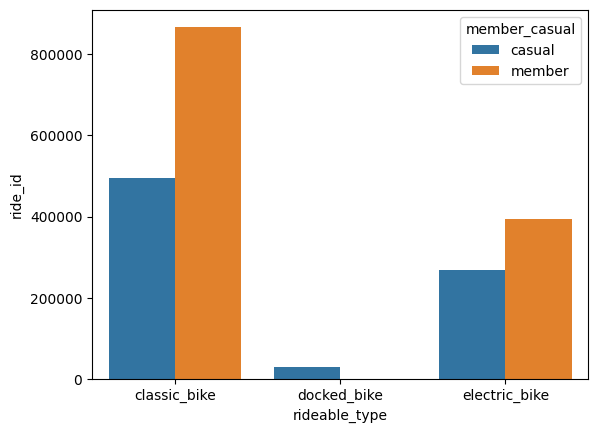

In [28]:
# Plot a bar chart using seaborn to compare bike type usage across user types
sns.barplot(
    data=bike_type_usage,      # Now this variable is defined!
    x='rideable_type',         # X-axis: Type of bike
    y='ride_id',               # Y-axis: Number of rides
    hue='member_casual'        # Differentiate by user type
)

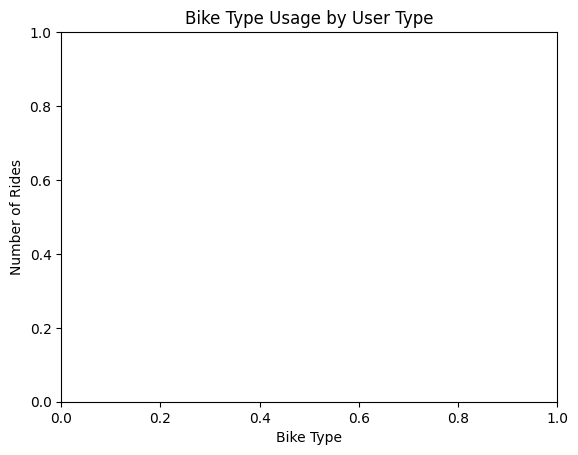

In [29]:
# Set the chart title
plt.title('Bike Type Usage by User Type')

# Set the Y-axis label
plt.ylabel('Number of Rides')

# Set the X-axis label
plt.xlabel('Bike Type')

# Display the plot
plt.show()

# Save Top Pairs to CSV

In [30]:
# Export final dataset to CSV
popular_pairs.to_csv("top_station_pairs.csv", index=False)

# Monthly Member vs Casual Comparison

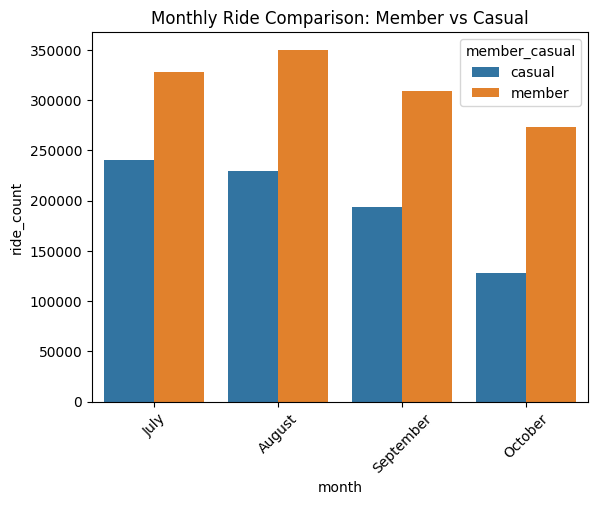

In [31]:
# Extract month name
monthly_users = df.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')
# Convert string to datetime format
monthly_users = monthly_users.sort_values(by='month', key=lambda x: pd.to_datetime(x, format='%B'))

# Extract month name
sns.barplot(data=monthly_users, x='month', y='ride_count', hue='member_casual')
plt.title("Monthly Ride Comparison: Member vs Casual")
plt.xticks(rotation=45)
plt.show()

# *Pairplot for Numerical Analysis

# Select Relevant Numerical Columns

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset for numerical features
# Extract hour of the day
pair_df = df[['ride_duration', 'hour']].copy()

# Add member_casual as Hue (for comparison)

In [33]:
pair_df['member_casual'] = df['member_casual']

# Plot Pairplot

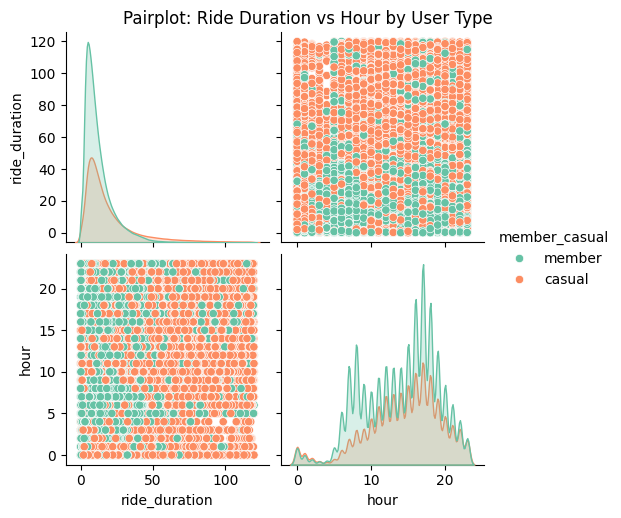

In [34]:
sns.pairplot(pair_df, hue='member_casual', palette='Set2')
plt.suptitle("Pairplot: Ride Duration vs Hour by User Type", y=1.02)
plt.show()

# * Pairplot Analysis of Ride Patterns by User Type
# OR
# Visualizing Ride Duration, Time & Location by User Type (Pairplot)

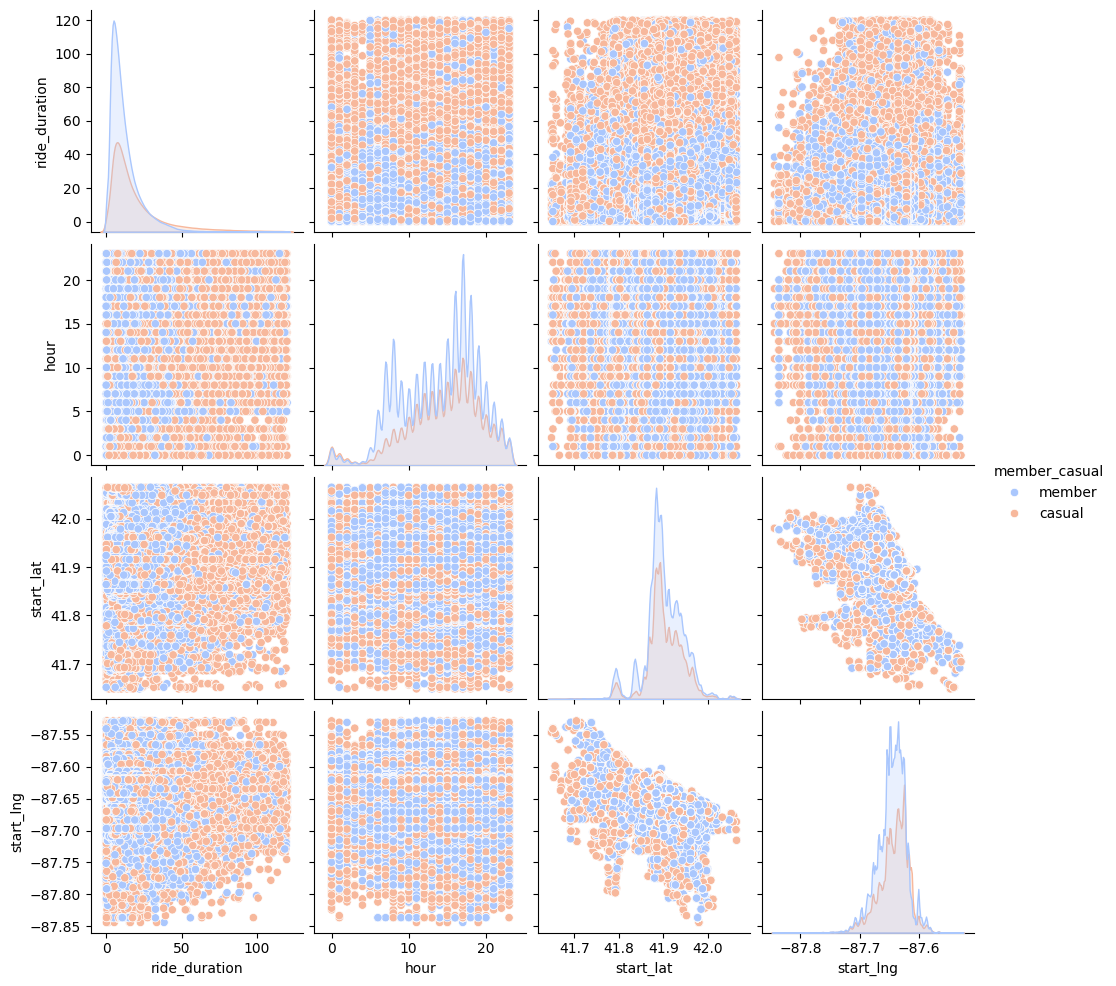

In [35]:
# Remove missing values
pair_df = df[['ride_duration', 'hour', 'start_lat', 'start_lng', 'member_casual']].dropna()
sns.pairplot(pair_df, hue='member_casual', palette='coolwarm')
plt.show()